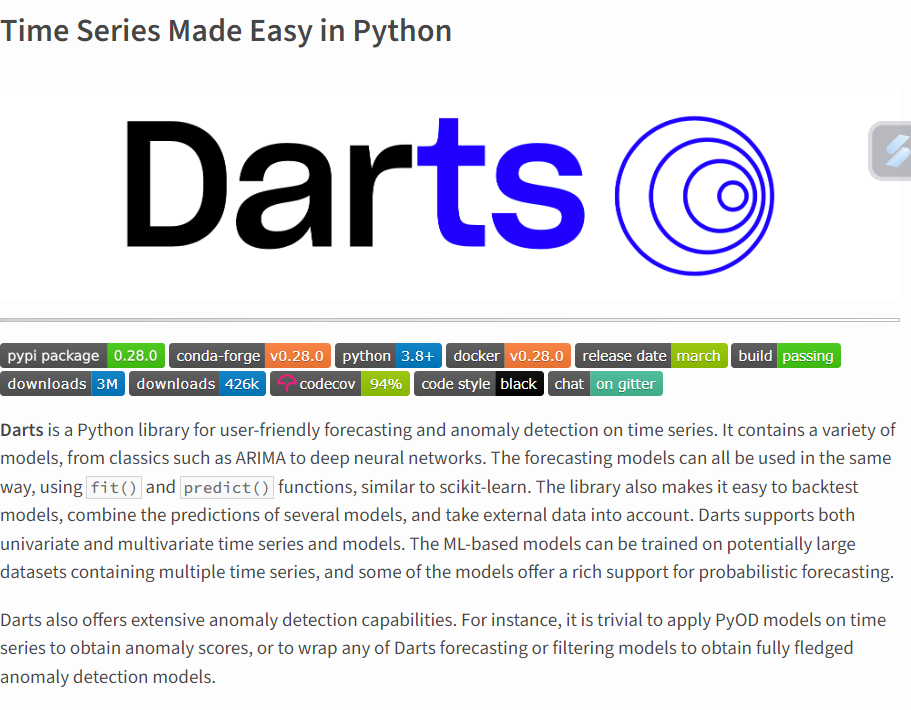

# Darts is a multivariate analysis, we can do tsf for 2 datasets at a time

# https://pypi.org/project/darts/

In [1]:
! pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.9/846.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 M

In [4]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

# these are inbuilt datasets in the darts

In [6]:
AirPassengersDataset().load()

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [7]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Name: #Passengers, Length: 144, dtype: float64

In [8]:
MonthlyMilkDataset().load()


<TimeSeries (DataArray) (Month: 168, component: 1, sample: 1)>
array([[[589.]],

       [[561.]],

       [[640.]],

       [[656.]],

       [[727.]],

       [[697.]],

       [[640.]],

       [[599.]],

       [[568.]],

       [[577.]],

...

       [[892.]],

       [[903.]],

       [[966.]],

       [[937.]],

       [[896.]],

       [[858.]],

       [[817.]],

       [[827.]],

       [[797.]],

       [[843.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1962-01-01 1962-02-01 ... 1975-12-01
  * component  (component) object 'Pounds per cow'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [9]:
MonthlyMilkDataset().load().pd_series()

Month
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
              ...  
1975-08-01    858.0
1975-09-01    817.0
1975-10-01    827.0
1975-11-01    797.0
1975-12-01    843.0
Freq: MS, Name: Pounds per cow, Length: 168, dtype: float64

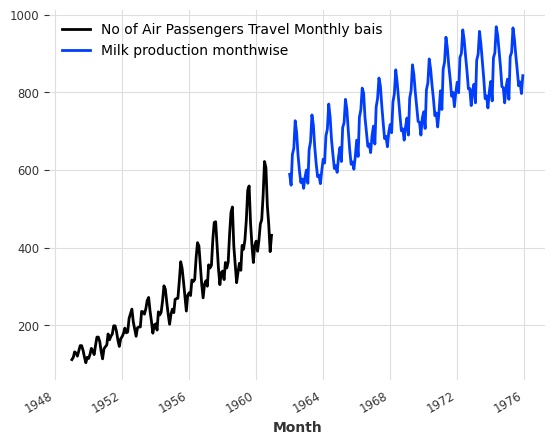

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

airline_dataset = AirPassengersDataset().load()
milk_dataset =MonthlyMilkDataset().load()

airline_dataset.plot(label ="No of Air Passengers Travel Monthly bais")
milk_dataset.plot(label ="Milk production monthwise")
plt.legend()
plt.show()

In [12]:
# When we are doing 2 dataset at a time, Normalising(preprocessing) is a mandatory

from darts.dataprocessing.transformers import Scaler
airline_scale, milk_scale = Scaler(), Scaler()
airline_scale_df = airline_scale.fit_transform(airline_dataset)
milk_scale_df = milk_scale.fit_transform(milk_dataset)

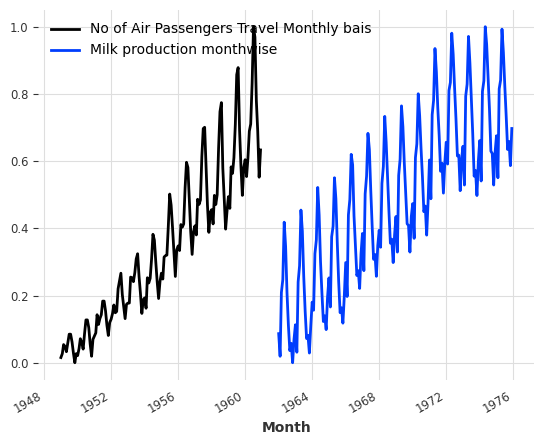

In [13]:
airline_scale_df.plot(label ="No of Air Passengers Travel Monthly bais")
milk_scale_df.plot(label ="Milk production monthwise")
plt.legend()
plt.show()

In [28]:
# Split the data into training and validation
train_air,val_air = airline_scale_df[:-36],airline_scale_df[-36:]

In [29]:
len(train_air)

108

In [30]:
len(val_air)

36

In [18]:
train_milk,val_milk = milk_scale_df[:-36],milk_scale_df[-36:]

In [19]:
len(train_milk)

132

In [21]:
len(val_milk)

36

# Building Time Series Forecasting model by using Deep Learning method-Darts

In [23]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries,linear_timeseries,sine_timeseries

In [26]:
from darts.models import TCNModel,TransformerModel,NBEATSModel,RNNModel,RandomForest

In [27]:
from darts.metrics import mape

In [31]:
model_air_milk = NBEATSModel(input_chunk_length =24,output_chunk_length =12,n_epochs =100, random_state =0)

In [32]:
model_air_milk.fit([train_air,train_milk],verbose = True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE = 7.16%


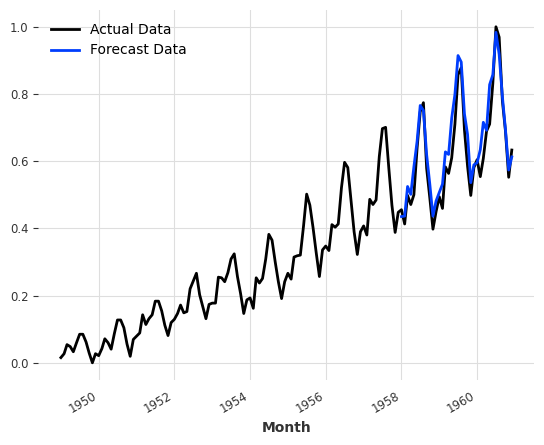

In [33]:
prediction = model_air_milk.predict(n=36, series =train_air)
airline_scale_df.plot(label = 'Actual Data')
prediction.plot(label ="Forecast Data")
plt.legend()
print("MAPE = {:.2F}%".format(mape(airline_scale_df,prediction)))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE = 13.34%


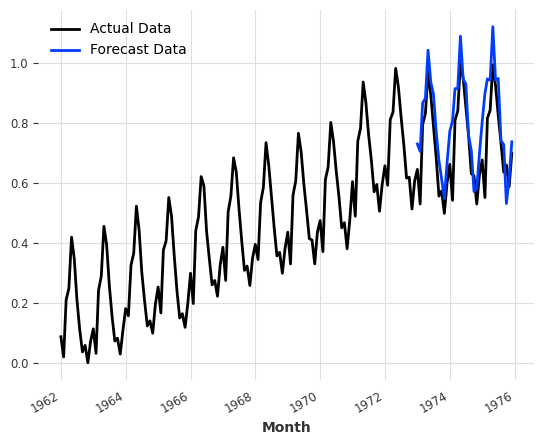

In [34]:
prediction = model_air_milk.predict(n=36, series =train_milk)
milk_scale_df.plot(label = 'Actual Data')
prediction.plot(label ="Forecast Data")
plt.legend()
print("MAPE = {:.2F}%".format(mape(milk_scale_df,prediction)))